In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
X=df.drop(columns=["Exited"])
y=df["Exited"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)

In [14]:
X_train_scale

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [16]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="binary_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [19]:
hitory=model.fit(X_train_scale,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
200/200 [==============================] - 2s 3ms/step - loss: 0.5328 - accuracy: 0.7722 - val_loss: 0.4712 - val_accuracy: 0.7981
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.8008 - val_loss: 0.4389 - val_accuracy: 0.8044
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8102 - val_loss: 0.4214 - val_accuracy: 0.8106
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8269 - val_loss: 0.4050 - val_accuracy: 0.8244
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8348 - val_loss: 0.3883 - val_accuracy: 0.8325
Epoch 6/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3816 - accuracy: 0.8445 - val_loss: 0.3756 - val_accuracy: 0.8394
Epoch 7/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8494 - val_loss: 0.3683 - val_accuracy: 0.8375

In [20]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(11, 11) dtype=float32, numpy=
 array([[-0.02155088, -0.13411357, -0.14896283,  0.06081104,  0.2668457 ,
         -0.19638346, -0.1054963 ,  0.02536075, -0.04202701, -0.15491965,
          0.13874109],
        [-0.13573611, -0.20170626,  0.95821005, -0.30732623, -0.5660969 ,
         -0.9296033 ,  0.8818918 ,  0.3231764 , -0.9639352 ,  0.1404705 ,
          0.27601832],
        [ 0.10309468, -0.34081036, -0.10231189,  0.1878927 , -0.32825196,
          0.16380772,  0.1889074 ,  0.2969807 , -0.01001042,  0.45878977,
         -0.02634251],
        [-1.1748599 , -0.09724074,  0.36707276,  0.22209516,  0.05210719,
         -0.04604001, -0.32152212, -0.5969546 ,  0.33008927, -0.6508175 ,
          0.39771098],
        [ 0.15225504,  1.3889834 , -0.38894227,  0.6217814 ,  0.11707421,
         -0.00607357,  0.46563703, -0.79230595,  0.1357459 , -0.2513527 ,
          0.9271197 ],
        [-0.03912908,  0.00352907,  0.03212748,  0.37010264, -0.0917218 ,
   

In [21]:
y_log=model.predict(X_test_scale)

63/63 [==============================] - 0s 1ms/step


In [22]:
y_pred=np.where(y_log>0.5,1,0)

In [23]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.866

In [25]:
hitory.history

{'loss': [0.5327884554862976,
  0.4558023512363434,
  0.43132296204566956,
  0.4141892194747925,
  0.39732930064201355,
  0.38162803649902344,
  0.3697490990161896,
  0.36152127385139465,
  0.3560927212238312,
  0.3521658778190613,
  0.349411278963089,
  0.34730109572410583,
  0.34551480412483215,
  0.34442374110221863,
  0.3429872989654541,
  0.3420882523059845,
  0.3407766819000244,
  0.3396849036216736,
  0.3393495976924896,
  0.33854392170906067,
  0.33763396739959717,
  0.33702385425567627,
  0.33645176887512207,
  0.33569231629371643,
  0.3349234461784363,
  0.334418386220932,
  0.3343084454536438,
  0.3337191641330719,
  0.3331902325153351,
  0.3329869508743286,
  0.33261531591415405,
  0.3315598964691162,
  0.3316967487335205,
  0.3314008414745331,
  0.33075249195098877,
  0.33109334111213684,
  0.3304128348827362,
  0.3299386203289032,
  0.32959839701652527,
  0.32944560050964355,
  0.32919642329216003,
  0.3293088972568512,
  0.3292618989944458,
  0.3286063075065613,
  0.3282

In [26]:
import matplotlib.pyplot as plt

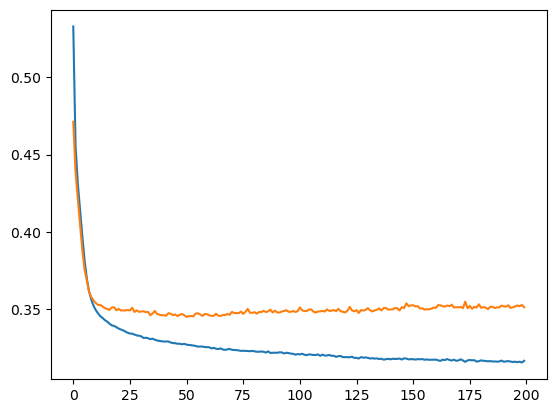

In [27]:
import matplotlib.pyplot as plt

plt.plot(hitory.history['loss'])
plt.plot(hitory.history['val_loss'])


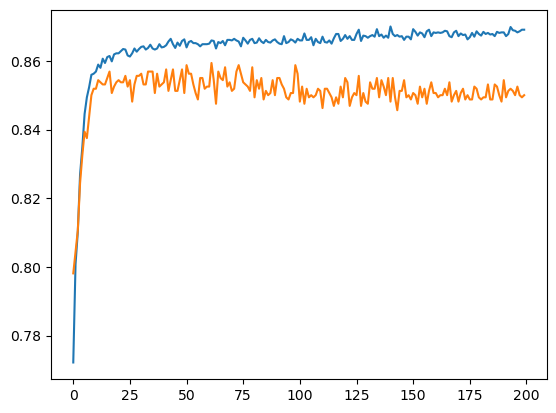

In [28]:
plt.plot(hitory.history['accuracy'])
plt.plot(hitory.history['val_accuracy'])